In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('datasets_737503_1278636_heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


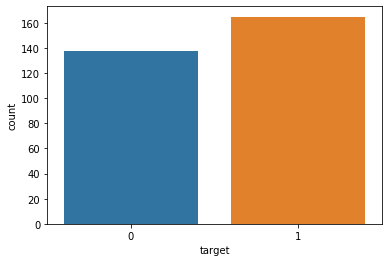

In [6]:
sns.countplot(df['target'])

In [7]:
### data looks good and clean

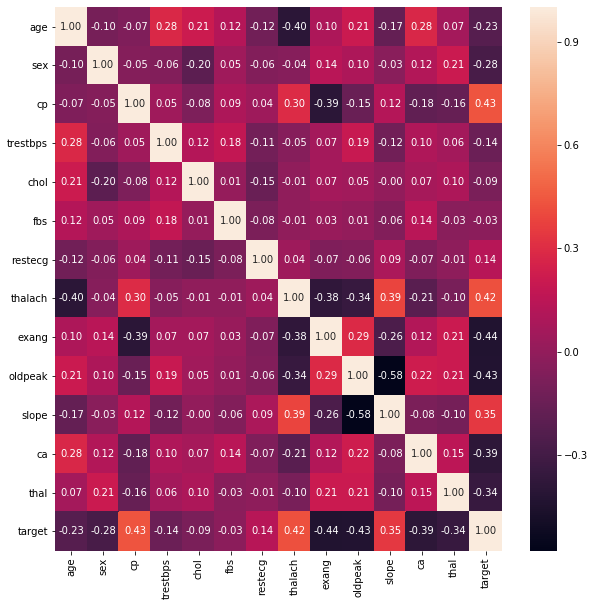

In [10]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f')

In [11]:
### not obvious correlation

In [12]:
y = df['target']
X = df.drop('target', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

c_values = [100, 10, 1, 0.1, 0.01]
penalty = ['l2']
solver = ['newton-cg', 'lbfgs', 'liblinear']
param = dict(solver = solver, penalty = penalty, C = c_values)

lg_grid = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
lg_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [17]:
lg_grid.best_estimator_

LogisticRegression(C=0.01, solver='liblinear')

In [18]:
log = LogisticRegression(C=0.01, solver='liblinear', penalty = 'l2')
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer, auc
from sklearn.metrics import precision_score,recall_score, f1_score

/Users/shijiecai/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [21]:
### since target is boolean, try bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

n_estimators = [100, 200, 300, 400]
max_depth = [4, 5, 6, 7]
min_samples_split = [2, 3, 4, 5]
max_features = ['auto', 'sqrt', 'log2']

params = dict(n_estimators = n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split)

rf_grid = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, cv=5, scoring = 'accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [24]:
rf_grid.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 100}

In [26]:
param = {'n_estimators':100, 'max_depth':6, 'max_features':'auto', 'min_samples_split':3}
rf = RandomForestClassifier(**param)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



Text(0.5, 0, 'index of the feature')

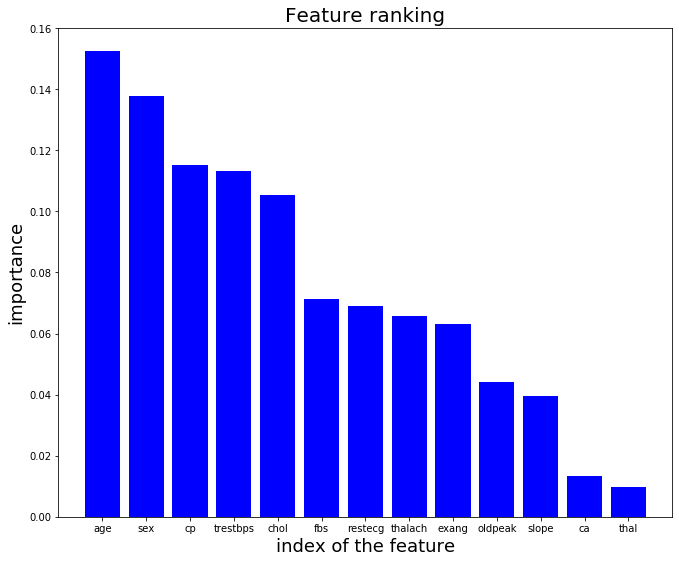

In [27]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns

f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importance[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

In [35]:
import eli5
from eli5.sklearn import PermutationImportance
model = RandomForestClassifier(**param).fit(X_train, y_train)
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0754 ± 0.0964,thal
0.0459 ± 0.0669,cp
0.0262 ± 0.0445,ca
0.0262 ± 0.0161,sex
0.0098 ± 0.0161,exang
0.0033 ± 0.0382,oldpeak
0 ± 0.0000,restecg
-0.0033 ± 0.0131,trestbps
-0.0033 ± 0.0245,slope
-0.0066 ± 0.0445,age


In [37]:
# how come 2 methods show us largely difference result 'thal' and 'age'

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
## Guessing: variables such as cp, restecg, exang, thal, etc, should be categorical variables not numeric values.

In [41]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'normal'
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'reversable defect'

/Users/shijiecai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shijiecai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/shijiecai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':

In [43]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,reversable defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,reversable defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,reversable defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,reversable defect,1


In [44]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [46]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1


In [47]:
y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = LogisticRegression()

c_values = [100, 10, 1, 0.1, 0.01]
penalty = ['l2']
solver = ['newton-cg', 'lbfgs', 'liblinear']
param = dict(solver = solver, penalty = penalty, C = c_values)

lg_grid = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
lg_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [49]:
lg_grid.best_estimator_

LogisticRegression(C=0.01, solver='newton-cg')

In [50]:
log = LogisticRegression(C = 0.01, solver = 'newton-cg', penalty = 'l2')
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [51]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [52]:
rf = RandomForestClassifier()

n_estimators = [100, 200, 300, 400]
max_depth = [4, 5, 6, 7]
min_samples_split = [2, 3, 4, 5]
max_features = ['auto', 'sqrt', 'log2']

params = dict(n_estimators = n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split)

rf_grid = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, cv=5, scoring = 'accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [53]:
rf_grid.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
param = {'n_estimators':100, 'max_depth':6, 'max_features':'log2', 'min_samples_split':2}
rf = RandomForestClassifier(**param)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Text(0.5, 0, 'index of the feature')

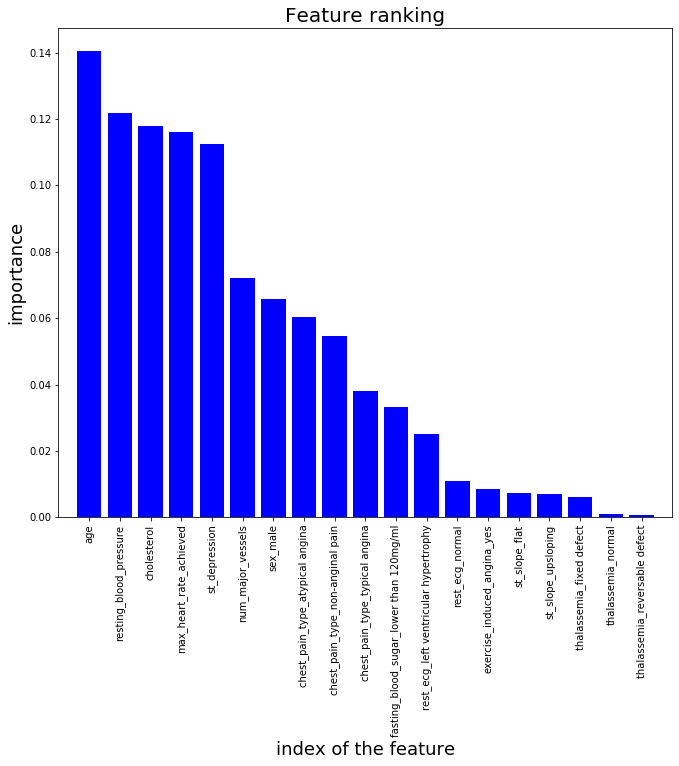

In [57]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns

f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importance[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

In [58]:
model = RandomForestClassifier(**param).fit(X_train, y_train)
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0590 ± 0.0445,chest_pain_type_typical angina
0.0492 ± 0.0587,num_major_vessels
0.0393 ± 0.0445,thalassemia_reversable defect
0.0361 ± 0.0482,max_heart_rate_achieved
0.0262 ± 0.0445,sex_male
0.0164 ± 0.0293,chest_pain_type_non-anginal pain
0.0164 ± 0.0207,st_slope_flat
0.0098 ± 0.0161,cholesterol
0.0066 ± 0.0161,exercise_induced_angina_yes
0.0033 ± 0.0131,rest_ecg_normal
